In [2]:
#Loading necessary libraries for the exercises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Read data with a time index**

pandas DataFrame objects can have an index denoting time, this recognized by Matplotlib for axis labeling.

This exercise involves reading data from `climate_change.csv`, containing `CO2` levels and `temperatures` recorded on the 6th of each month from 1958 to 2016, using pandas' `read_csv` function. The `parse_dates` and `index_col` arguments help set a DateTimeIndex.

Don't forget to check out the Matplotlib Cheat Sheet for a quick overview of essential concepts and methods.

Instructions:
* Import the `pandas` library as `pd`.
* Read in the data from a CSV file called `'climate_change.csv'` using `pd.read_csv`.
* Use the `parse_dates` key-word argument set to `True` to parse the `"date"` column as dates.
* Use the `index_col` key-word argument to set the `"date"` column as the index.


In [4]:
# Import pandas as pd
import pandas as pd

# Read the data from the CSV file
df = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/climate_change.csv?raw=True', parse_dates=['date'], index_col='date')

# Display the first few rows of the dataframe to check
print(df.head())


               co2  relative_temp
date                             
1958-03-06  315.71           0.10
1958-04-06  317.45           0.01
1958-05-06  317.50           0.08
1958-06-06     NaN          -0.05
1958-07-06  315.86           0.06


# **Plot time-series data**

To plot time-series data, we use the Axes object plot command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

This exercise provides data stored in a DataFrame called `climate_change` loaded by you in the previous codecell. This variable has a time-index with the dates of measurements and two data columns: `"co2"` and `"relative_temp"`.

In this case, the index of the DataFrame would be used as the x-axis values and we will plot the values stored in the `"relative_temp"` column as the y-axis values. We will also properly label the x-axis and y-axis.

**Instructions:**
* Add the data from `climate_change` to the plot: use the DataFrame index for the `x` value and the `"relative_temp" `column for the `y `values.
* Set the x-axis label to `'Time'`.
* Set the y-axis label to `'Relative temperature (Celsius)'`.
* Show the figure.


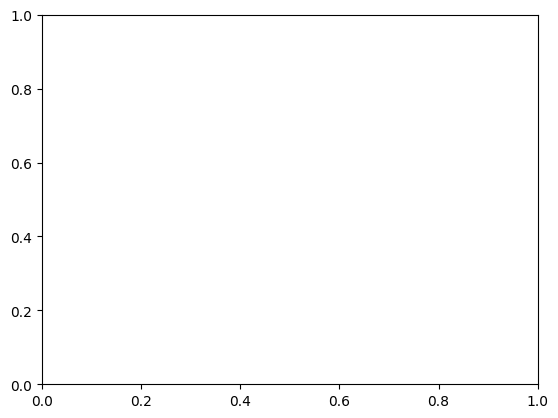

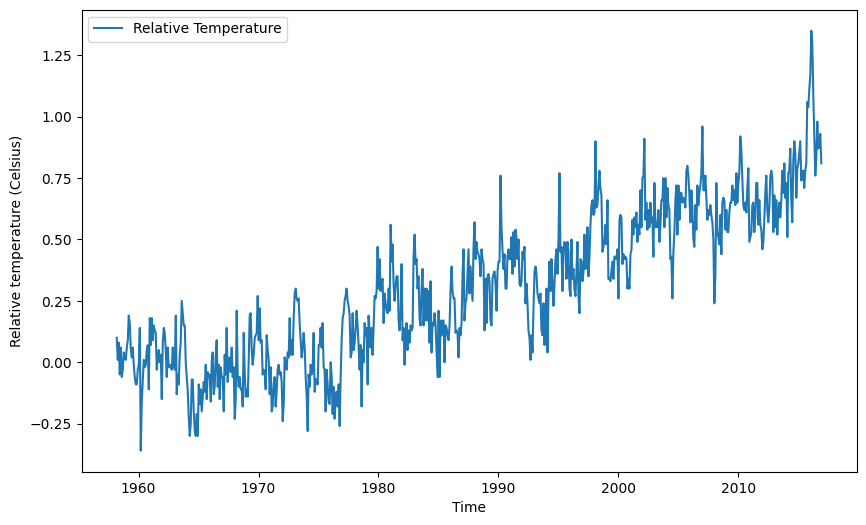

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

df = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/climate_change.csv?raw=True', parse_dates=['date'], index_col='date')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['relative_temp'], label='Relative Temperature')

# Set labels
plt.xlabel('Time')
plt.ylabel('Relative temperature (Celsius)')

# Show the plot
plt.legend()
plt.show()


**Using a time index to zoom in**

When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a range of dates to zoom in on a particular period within the time-series using pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.

The data to use is loaded and stored in a DataFrame called `climate_change` by you in one of the previous codecells, which has a time-index with dates of measurements and two data columns: `"co2"` and `"relative_temp"`.

**Instructions:**
* Use `plt.subplots` to create a Figure with one Axes called `fig` and `ax`, respectively.
* Create a variable called `seventies` that includes all the data between `"1970-01-01" and "1979-12-31"`.
* Add the data from `seventies` to the plot: use the DataFrame index for the `x `value and the `"co2"` column for the `y` values.



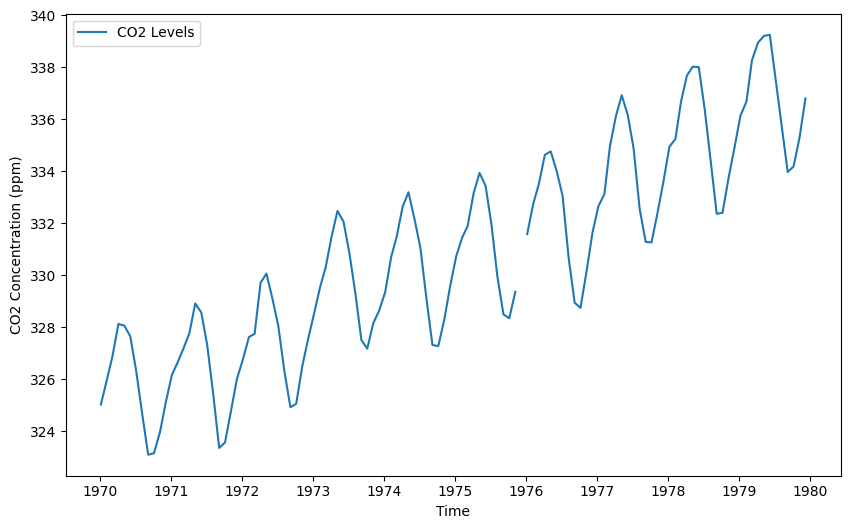

In [11]:


# Use plt.subplots to create a Figure and Axes
fig, ax = plt.subplots(figsize=(10, 6))

# Select the data from 1970-01-01 to 1979-12-31
seventies = df['1970-01-01':'1979-12-31']

# Plot the data for CO2
ax.plot(seventies.index, seventies['co2'], label='CO2 Levels')

# Set labels
ax.set_xlabel('Time')
ax.set_ylabel('CO2 Concentration (ppm)')

# Add a legend and show the plot
ax.legend()
plt.show()




# **Plotting two variables**

If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the `twinx` method.

In this exercise, you'll have access to a DataFrame that has the `climate_change` data loaded by you in one of the previous codecells. This DataFrame was loaded with the `"date"` column set as a DateTimeIndex, and it has a column called `"co2"` with carbon dioxide measurements and a column called `"relative_temp"` with temperature measurements.

**Instructions:**
* Use `plt.subplots` to create a Figure and Axes objects called `fig` and `ax`, respectively.
* Plot the carbon dioxide variable in blue using the Axes plot method.
* Use the Axes `twinx` method to create a twin Axes that shares the x-axis.
* Plot the relative temperature variable in red on the twin Axes using its plot method.


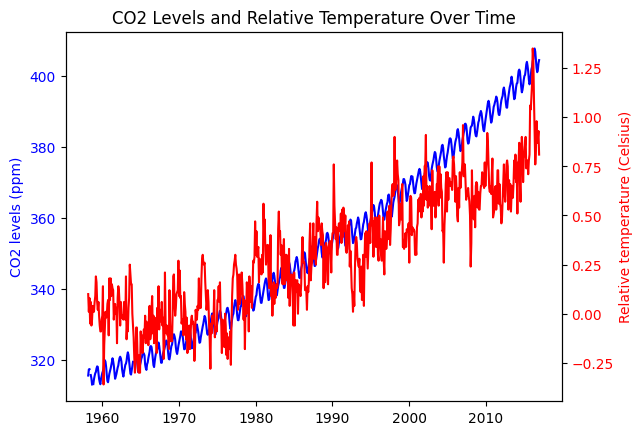

In [3]:
import pandas as pd

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(
    'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/climate_change.csv?raw=True',
    parse_dates=['date'],
    index_col='date'
)

# Create a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 levels in blue on the first Axes
ax.plot(df.index, df['co2'], color='blue')
ax.set_ylabel('CO2 levels (ppm)', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature in red on the twin Axes
ax2.plot(df.index, df['relative_temp'], color='red')
ax2.set_ylabel('Relative temperature (Celsius)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('CO2 Levels and Relative Temperature Over Time')

# Show the plot
plt.show()


# **Defining a function that plots time-series data**

Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as `x` and `y` inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.

**Instructions:**
* Define a function called `plot_timeseries` that takes as input an Axes object (`axes`), data (`x,y`), a string with the name of a `color` and strings for x- and y-axis labels.
* Plot `y` as a function of `x ` in the color provided as the input color.
* Set the x- and y-axis labels using the provided input `xlabel` and `ylabel`, setting the y-axis label color using color.
* Set the y-axis tick parameters using the `tick_params` method of the Axes object, setting the colors key-word to color.


In [7]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  axes.plot(x, y, color=color)

    # Set the x and y labels
  axes.set_xlabel(xlabel)
  axes.set_ylabel(ylabel, color=color)

    # Set the tick parameters for the y-axis
  axes.tick_params(axis='y', labelcolor=color)



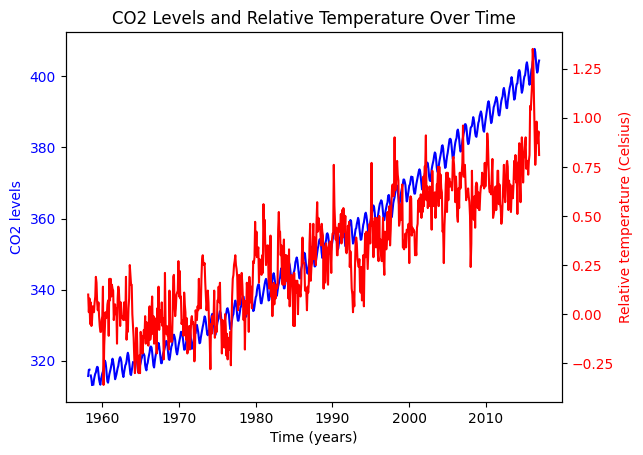

In [11]:
fig, ax = plt.subplots()

df = pd.read_csv(
    'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/climate_change.csv?raw=True',
    parse_dates=['date'],
    index_col='date'
)

plot_timeseries(ax,df.index, df['co2'], color='blue',
                xlabel='Time (years)', ylabel='CO2 levels')

# Create a twin Axes object sharing the x-axis
ax2 = ax.twinx()

# Plot relative temperature in red
plot_timeseries(ax2, df.index, df['relative_temp'], color='red',
                xlabel='Time (years)', ylabel='Relative temperature (Celsius)')

# Add a title
plt.title('CO2 Levels and Relative Temperature Over Time')

# Show the plot
plt.show()



# **Using a plotting function**

Defining functions allows us to reuse the same code without having to repeat all of it. Programmers sometimes say "Don't repeat yourself".

In the previous exercise, you defined a function called `plot_timeseries`:

`plot_timeseries(axes, x, y, color, xlabel, ylabel)`

that takes an Axes object (as the argument `axes`), time-series data (as `x` and `y` arguments) the name of a color (as a string, provided as the `color` argument) and x-axis and y-axis labels (as `xlabel` and `ylabel` arguments). In this exercise, the function `plot_timeseries` is already defined by you in the previous codecell.

Use this function to plot the `climate_change` time-series data, provided as a pandas DataFrame object that has a DateTimeIndex with the dates of the measurements and `co2` and `relative_temp` columns.

**Instructions:**
* In the provided `ax` object, use the function `plot_timeseries` to plot the `"co2"` column in blue, with the x-axis label `"Time (years)"` and y-axis label `"CO2 levels"`.
* Use the `ax.twinx `method to add an Axes object to the figure that shares the x-axis with `ax`.
* Use the function `plot_timeseries` to add the data in the `"relative_temp"` column in red to the twin Axes object, with the x-axis label `"Time (years)"` and y-axis label `"Relative temperature (Celsius)"`.


# **Annotating a plot of time-series data**

Annotating a plot allows us to highlight interesting information in the plot. For example, in describing the climate change dataset, we might want to point to the date at which the relative temperature first exceeded 1 degree Celsius.

For this, we will use the annotate method of the Axes object. In this exercise, you will have the DataFrame called `climate_change` loaded into memory by you in one of the previous codecells. Using the Axes methods, plot only the relative temperature column as a function of dates, and annotate the data.

**Instructions:**
* Use the `ax.plot` method to plot the DataFrame index against the `relative_temp` column.
* Use the annotate method to add the text `'>1 degree'` in the location (`pd.Timestamp('2015-10-06'), 1)`.


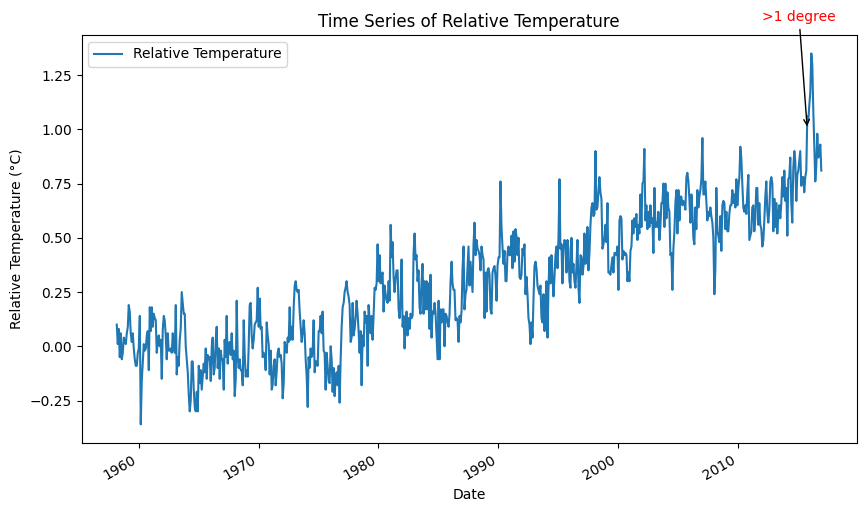

In [13]:


ax = df['relative_temp'].plot(figsize=(10, 6), label="Relative Temperature")

# Annotate the point where temperature first exceeds 1 degree
ax.annotate('>1 degree',
            xy=(pd.Timestamp('2015-10-06'), 1),  # Point to annotate
            xytext=(pd.Timestamp('2012-01-01'), 1.5),  # Text location
            arrowprops=dict(facecolor='red', arrowstyle='->'),
            fontsize=10, color='red')

# Add title and labels
ax.set_title("Time Series of Relative Temperature")
ax.set_xlabel("Date")
ax.set_ylabel("Relative Temperature (°C)")
ax.legend()

plt.show()



# **Plotting time-series: putting it all together**

In this exercise, you will plot two time-series with different scales on the same Axes, and annotate the data from one of these series.

The CO2/temperatures data is loaded by you in one of the previous codecells and provided as a DataFrame called `climate_change`. You should also use the function that we have defined before, called `plot_timeseries`, which takes an Axes object (as the axes argument) plots a time-series (provided as `x` and `y` arguments), sets the labels for the x-axis and y-axis and sets the color for the data, and for the y tick/axis labels:

`plot_timeseries(axes, x, y, color, xlabel, ylabel)`

Then, you will annotate with text an important time-point in the data: on `2015-10-06`, when the temperature first rose to above `1` degree over the average.

**Instructions:**
* Use the `plot_timeseries` function to plot CO2 levels against time. Set xlabel to `"Time (years)"` ylabel to `"CO2 levels"` and color to `'blue'`.
* Create `ax2`, as a twin of the first Axes.
* In ax2, plot temperature against time, setting the color ylabel to `"Relative temp (Celsius)"` and color to `'red'`.
* Annotate the data using the `ax2.annotate` method. Place the text `">1 degree"` in `x=pd.Timestamp('2008-10-06'), y=-0.2` pointing with a gray thin arrow to `x=pd.Timestamp('2015-10-06'), y = 1`.


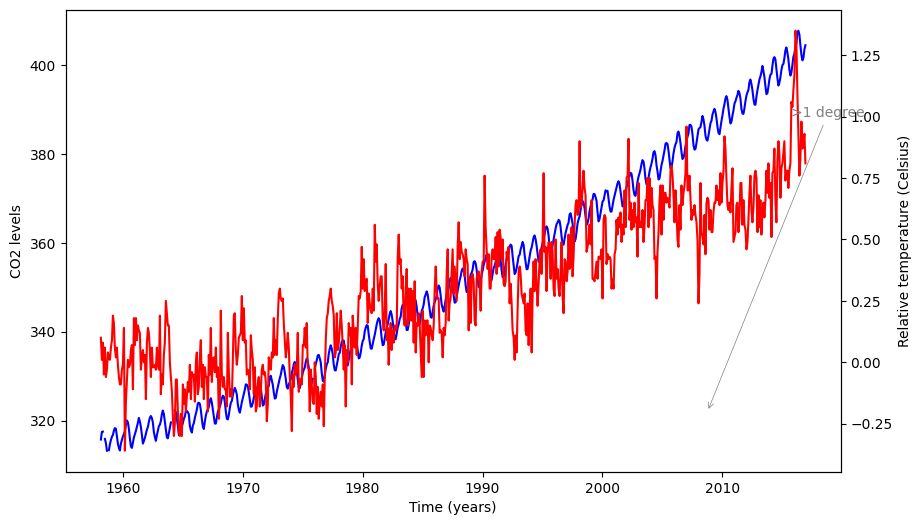

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(
    'https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/climate_change.csv?raw=True',
    parse_dates=['date'],
    index_col='date'
)


# Assuming the plot_timeseries function is defined somewhere

def plot_timeseries(ax, x, y, color, xlabel, ylabel):
  ax.plot(x, y, color=color)
  ax.set_xlabel(xlabel)
  ax.set_ylabel(ylabel)

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the CO2 levels time-series in blue

plot_timeseries(ax, df.index, df['co2'], color='blue',
                xlabel='Time (years)', ylabel='CO2 levels')


# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, df.index, df['relative_temp'], color='red',
                xlabel='Time (years)', ylabel='Relative temperature (Celsius)')

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree",
             xy=(pd.Timestamp('2008-10-06'), -0.2),  # Point to annotate
             xytext=(pd.Timestamp('2015-10-06'), 1),  # Text location
             arrowprops={'arrowstyle': '->', 'color': 'gray', 'linewidth': 0.5},
             fontsize=10, color='gray')

plt.show()